# <u>*Renewal Process*</u>

### It is an arrival process where the inter-arrival intervals are positive, IID, continuous random variables. Poisson process is a specific type of Renewal Process, where the inter-arrival time is exponentially distributed.

In [2]:
# Importing important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import triang
from scipy.stats import gamma

## *Section 1 :* 
### Simulating 2 r.v's from a continuous distribution and checking if the probability that the sum of the 2 rv's is less than a given number n is coming to be same as the theoretical probability

#### $\texttt{S 1.1 : Sum of 2 iid Uniform Random Variables follows Triangular Distribution}$

P(X+Y<0.5) =0.87357
P(X+Y<0) =0.4997


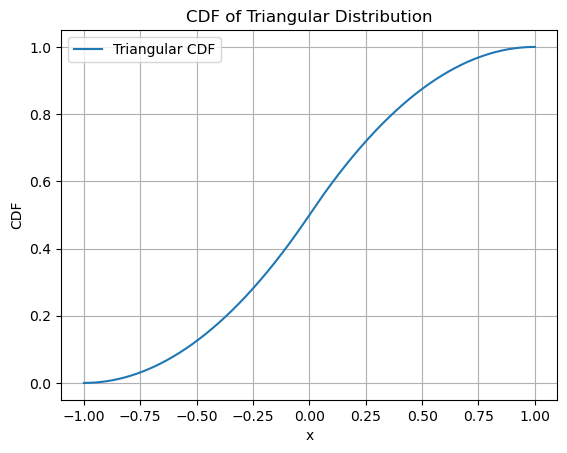

In [6]:
#Probability that sum of 2 uniform rv's is less than n (Simulation)

np.random.seed(123)
def Uniform(n):
  sample_size = 100000
  samples = []
  for i in range(sample_size):
    X = np.random.uniform(0,1,size=1)
    Z = np.random.uniform(-1,0,size=1)
    samples.append(X+Z)
  samples = np.array(samples)
  count = 0
  for i in range(sample_size):
    if samples[i]<n:
      count+=1
  print(f"P(X+Y<{n}) ={count/sample_size}")

Uniform(0.5)
Uniform(0)

#Probability that 1 Triangular rv is less than n (Theoretical)

# Define parameters of the triangular distribution
a = -1   # Lower limit
b = 1   # Upper limit
c = 0   # Mode

# Create a triangular distribution object
triangular_dist = triang(c=(c - a) / (b - a), loc=a, scale=b - a)

# Generate some values to evaluate the CDF
x_values = np.linspace(a, b, 1000)

# Calculate the CDF values
cdf_values = triangular_dist.cdf(x_values)

# Plot the CDF
plt.plot(x_values, cdf_values, label='Triangular CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('CDF of Triangular Distribution')

plt.legend()
plt.grid(True)
plt.show()


#### $\texttt {S 1.2 : Sum of 2 iid Normal Random Variables with parameters m1, v1 and m2,v2, follows Normal Distribution with parameters m1+m2, v1+v2}$

P(X+Y<28) =0.23868
P(X+Y<35) =0.96047


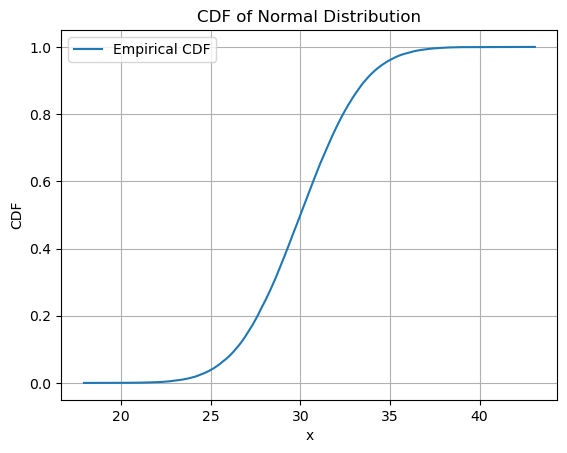

In [103]:
#Probability that sum of 2 Normal rv's with parameters m1,v1 and m2,v2 is less than n (Simulation)

np.random.seed(123)
def Normal(n):
  sample_size = 100000
  samples = []
  for i in range(sample_size):
    X = np.random.normal(15,2,size=1)
    Y = np.random.normal(15,2,size=1)
    samples.append(X+Y)
  samples = np.array(samples)
  count = 0
  for i in range(sample_size):
    if samples[i]<n:
      count+=1
  print(f"P(X+Y<{n}) ={count/sample_size}")

Normal(28)
Normal(35)

#Probability that 1 Normal rv with parameters m1+m2,v1+v2 is less than n (Theoretical)

# Set the parameters for the normal distribution
mean = 30
std_dev = np.sqrt(8)
num_samples = 100000

# Generate random samples from the normal distribution
samples = np.random.normal(mean, std_dev, num_samples)

# Sort the samples
samples_sorted = np.sort(samples)

# Calculate the empirical cumulative distribution function (CDF)
cdf = np.arange(1, num_samples + 1) / num_samples

# Plot the CDF
plt.plot(samples_sorted, cdf, label='Empirical CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('CDF of Normal Distribution')
plt.grid(True)
plt.legend()
plt.show()

#### $\texttt {S 1.3 : Sum of 2 iid Exponential Random Variables with rate lambda follows Gamma distribution with parameters n=2,rate=lambda}$

P(X+Y<15)=0.79982
P(X+Y<20)=0.90878


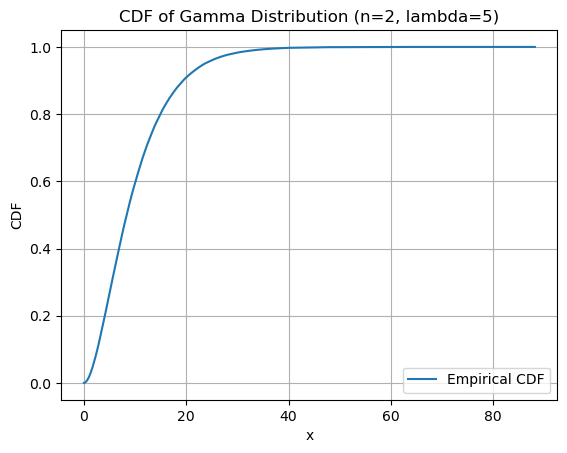

In [24]:
#Probability that sum of 2 Exponential rv's with parameters l is less than n (Simulation)

np.random.seed(123)
def Exponential(n):
  sample_size = 100000
  samples = []
  for i in range(sample_size):
    X = np.random.exponential(5,size=1)
    Y = np.random.exponential(5,size=1)
    samples.append(X+Y)
  samples = np.array(samples)
  count = 0
  for i in range(sample_size):
    if samples[i]<n:
      count+=1
  print(f"P(X+Y<{n})={count/sample_size}")

Exponential(15)
Exponential(20)

#Probability that 1 Gamma rv with parameters n=2,lambda=l is less than n (Theoretical)


# Set the parameters for the gamma distribution
n = 2
lambda_ = 5
num_samples = 100000

# Generate random samples from the gamma distribution
samples = np.random.gamma(n, scale=lambda_, size=num_samples)

# Sort the samples
samples_sorted = np.sort(samples)

# Calculate the empirical cumulative distribution function (CDF)
cdf = np.arange(1, num_samples + 1) / num_samples

# Plot the CDF
plt.plot(samples_sorted, cdf, label='Empirical CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('CDF of Gamma Distribution (n=2, lambda=5)')
plt.grid(True)
plt.legend()
plt.show()


## *Section 2 :* 
### Simulating Renewal Processes where inter-arrival times follow different continuous distributions

#### Question : Assume we have a set of car tires that have a lifespan distributed by the following continuous distributions. When a tire goes flat, you replace it with a similar tire immediately , and thus the process of "renewing" this set of tires continues. 

#### i) How many times are you expected to replace the tires over a period of 10 months?
#### ii) What is the expected time to replace a tire for the third time?


### $\texttt { S 2.1 : Normal Distribution}$

DataFrame with Renewal Events:
    Cumulative Time  Event_Number
0          0.914369             1
1          3.911715             2
2          6.194693             3
3          6.688399             4
4          8.109798             5
5         11.761235             6
6         12.187914             7
7         13.759002             8
8         17.024938             9
9         18.158197            10
10        19.479311            11


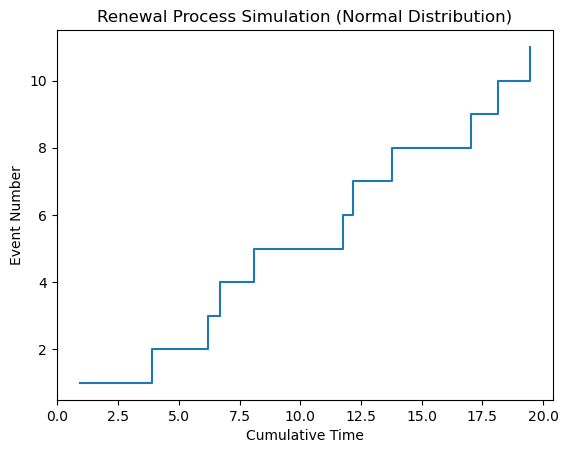

In [7]:
np.random.seed(123)
def simulate_renewal(mu, sigma, T):
    t = 0       # Initialize time
    events = [] # Initialize list to store event times
    
    while t < T:
        inter_arrival_time = abs(np.random.normal(mu, sigma)) # Generate inter-arrival time
        t += inter_arrival_time                                  # Update time
        if t < T:
            events.append(t)                                     # Record event time
    
    return events

# Parameters
mu = 2     # Mean of the normal distribution
sigma = 1  # Standard deviation of the normal distribution
T = 20     # Total simulation time

# Simulate renewal Poisson process
events = simulate_renewal(mu, sigma, T)

# Convert events list to DataFrame
df = pd.DataFrame({'Cumulative Time': events})

# Expand DataFrame to create a large dataset with increasing event numbers
df['Event_Number'] = np.arange(1, len(df) + 1)

# Print the DataFrame
print("DataFrame with Renewal Events:")
print(df)

# Plot the process
plt.step(df['Cumulative Time'], df['Event_Number'], where='post')
plt.xlabel('Cumulative Time')
plt.ylabel('Event Number')
plt.title('Renewal Process Simulation (Normal Distribution)')
plt.show()

### $\texttt { S 2.2 : Uniform Distribution}$

DataFrame with Renewal Process Events:
   Event_Time  Event_Number
0    5.875284             1
1    8.878260             2
2   11.466220             3
3   16.325423             4


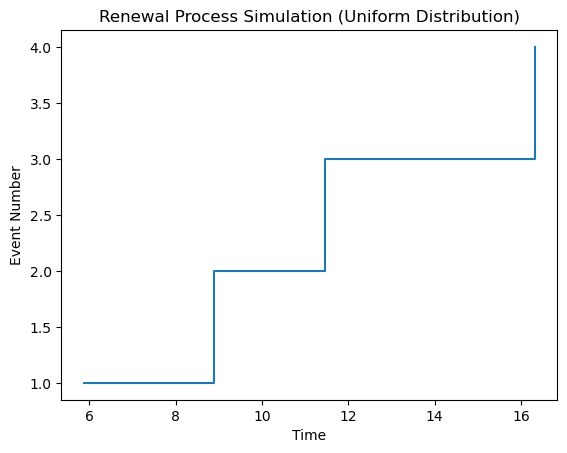

In [15]:
np.random.seed(123)
def simulate_renewal(a, b, T):
    t = 0       # Initialize time
    events = [] # Initialize list to store event times
    
    while t < T:
        inter_arrival_time = np.random.uniform(a, b) # Generate inter-arrival time
        t += inter_arrival_time                     # Update time
        if t < T:
            events.append(t)                        # Record event time
    
    return events

# Parameters
a = 1     # Lower bound of the uniform distribution
b = 8    # Upper bound of the uniform distribution
T = 20    # Total simulation time

# Simulate renewal process
events = simulate_renewal(a, b, T)

# Convert events list to DataFrame
df = pd.DataFrame({'Event_Time': events})

# Expand DataFrame to create a large dataset with increasing event numbers
df['Event_Number'] = np.arange(1, len(df) + 1)

# Print the DataFrame
print("DataFrame with Renewal Process Events:")
print(df)

# Plot the Poisson process
plt.step(df['Event_Time'], df['Event_Number'], where='post')
plt.xlabel('Time')
plt.ylabel('Event Number')
plt.title('Renewal Process Simulation (Uniform Distribution)')
plt.show()

### $\texttt { S 2.3 : Exponential Distribution}$

DataFrame with Renewal Process Events:
   Cumulative Time  Event_Number
0         0.596136             1
1         0.764670             2
2         0.893312             3
3         1.294029             4
4         1.929564             5
5         2.204613             6
6         4.180104             7
7         4.757425             8


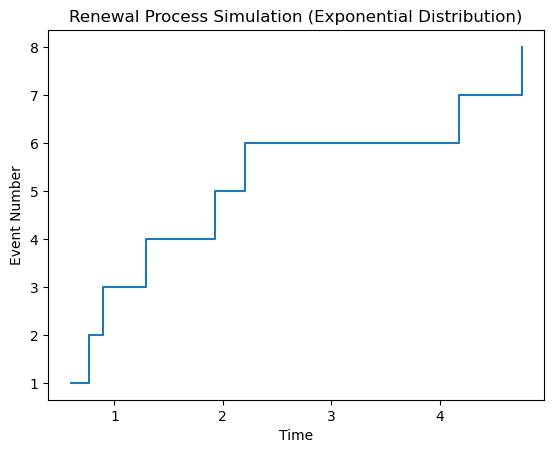

In [17]:
np.random.seed(123)
def simulate_renewal(rate, T):
    t = 0       # Initialize time
    events = [] # Initialize list to store event times
    
    while t < T:
        inter_arrival_time = np.random.exponential(scale=1/rate) # Generate inter-arrival time
        t += inter_arrival_time                                  # Update time
        if t < T:
            events.append(t)                                     # Record event time
    
    return events

# Parameters
rate = 2   # Rate parameter of the exponential distribution
T = 5     # Total simulation time

# Simulate renewal Poisson process
events = simulate_renewal(rate, T)

# Convert events list to DataFrame
df = pd.DataFrame({'Cumulative Time': events})

# Expand DataFrame to create a large dataset with increasing event numbers
df['Event_Number'] = np.arange(1, len(df) + 1)

# Print the DataFrame
print("DataFrame with Renewal Process Events:")
print(df)

# Plot the Poisson process
plt.step(df['Cumulative Time'], df['Event_Number'], where='post')
plt.xlabel('Time')
plt.ylabel('Event Number')
plt.title('Renewal Process Simulation (Exponential Distribution)')
plt.show()


## *Section 3 :* 

### Problem on Renewal Processs

#### Question : In your home, you have two types of bulbs by Company A and Company B. Lifetime of the bulbs follow the Uniform(0,1) distribution.
* **When are you expected to replace the first bulb which is currently working ?**
* **What is the expected time to replace the other bulb which is currently working?**
* **What is the probability that the first 2 bulbs replaced are by Company A (assume you replace company A bulb with company A and B with B)?**

### $\texttt { If X1 follows U(0,1) and X2 follows U(0,1), then X(r) follows Beta1(r,n-r+1) => E[X(r)]=r/(n+1)}$

In [18]:
np.random.seed(123)
min=[]
max=[]
A=np.random.uniform(0,1,10000)
B=np.random.uniform(0,1,10000)
for i in range(len(A)):
    if A[i]<B[i]:
        min.append(A[i])
    else:
        max.append(A[i])
prob=(len(min)/len(A))*(len(min)/len(A))
print(f"We replace the first bulb after {np.mean(min)} days.")
print(f"We replace the other bulb, which is currently working, after {np.mean(max)} days.")
print(f"The probability that the first 2 bulbs replaced are by Company A = {prob}")

#Verifying the results with theoretical answers

beta=np.random.beta(1,2,10000)
print(f"E[X(1)] = {np.mean(beta)}")
beta1=np.random.beta(2,1,10000)
print(f"E[X(2)] = {np.mean(beta1)}")

We replace the first bulb after 0.3296316419130704 days.
We replace the other bulb, which is currently working, after 0.6663592300841811 days.
The probability that the first 2 bulbs replaced are by Company A = 0.24930049
E[X(1)] = 0.3323198847625651
E[X(2)] = 0.6667818578316648


## *Section 4 :* 

### Inspection Paradox

### Question : Buses come at an inter-arrival time of 5 minutes and 15 minutes with probability 1/3 and 2/3 respectively. The paradox is that the passengers will always say that the expected arrival times of buses is more than what the actual expected time is. How is that possible?

In [20]:
avg1=(1/3)*5+(2/3)*15
print(f"The average inter-arrival time of buses = {avg1} minutes.")
np.random.seed(123)
random_numbers=np.random.uniform(0,1,1000000)
list=[]
sum_5 = 0
sum_15 = 0
for number in random_numbers:
    if number < 1/3:
        list.append(5)
        sum_5+=5
    else:
        list.append(15)
        sum_15+=15
print(f"The average inter-arrival time of buses (through simulation) = {np.mean(list)} minutes.")

The average inter-arrival time of buses = 11.666666666666666 minutes.
The average inter-arrival time of buses (through simulation) = 11.6705 minutes.


####  We consider 1 passenger comes in 1 minute. Then 5 passengers come in 5 minutes and 15 passengers come in 15 minutes. Thus (2 (probability) * 3 (time) = 6 times more people say that the bus comes after 15 minutes.}

In [21]:
avg2=(6/7)*15+(1/7)*5
print(f"The average inter-arrival time of buses according to passengers = {avg2} minutes.")

a=sum_5/np.sum(list)
b=sum_15/np.sum(list)
avg22=(a*5)+(b*15)
print(f"The average inter-arrival time of buses according to passengers (through simulation) = {avg22} minutes.")

The average inter-arrival time of buses according to passengers = 13.57142857142857 minutes.
The average inter-arrival time of buses according to passengers (through simulation) = 13.573540122531169 minutes.


##### Let's see what happens when the inter-arrival times follow some continuous distributions.

In [14]:
# Uniform Distribution
np.random.seed(123)
r=np.random.uniform(5,15,1000000)
print(f"The average inter-arrival time of buses (through simulation) = {np.mean(r)} minutes.")
avgg = 0
s=np.sum(r)
for i in r:
    avgg+=(i/s)*i
print(f"The average inter-arrival time of buses according to passengers (through simulation) = {avgg} minutes.")

The average inter-arrival time of buses (through simulation) = 9.999334387281458 minutes.
The average inter-arrival time of buses according to passengers (through simulation) = 10.831635034744627 minutes.


In [16]:
# Normal Distribution
np.random.seed(123)
r=np.random.normal(10,4,1000000)
print(f"The average inter-arrival time of buses (through simulation) = {np.mean(r)} minutes.")
avgg = 0
s=np.sum(r)
for i in r:
    avgg+=(i/s)*i
print(f"The average inter-arrival time of buses according to passengers (through simulation) = {avgg} minutes.")

The average inter-arrival time of buses (through simulation) = 10.002518005229417 minutes.
The average inter-arrival time of buses according to passengers (through simulation) = 11.602942495992409 minutes.


### $\texttt {Let's see what happens when the inter-arrival times are exponentially distributed}$

In [22]:
np.random.seed(123)
r=np.random.exponential(10,1000000)
print(f"The average inter-arrival time of buses (through simulation) = {np.mean(r)} minutes.")
avgg = 0
s=np.sum(r)
for i in r:
    avgg+=(i/s)*i
print(f"The average inter-arrival time of buses according to passengers (through simulation) = {avgg} minutes.")

The average inter-arrival time of buses (through simulation) = 9.994139190696146 minutes.
The average inter-arrival time of buses according to passengers (through simulation) = 19.99230888764893 minutes.
